   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

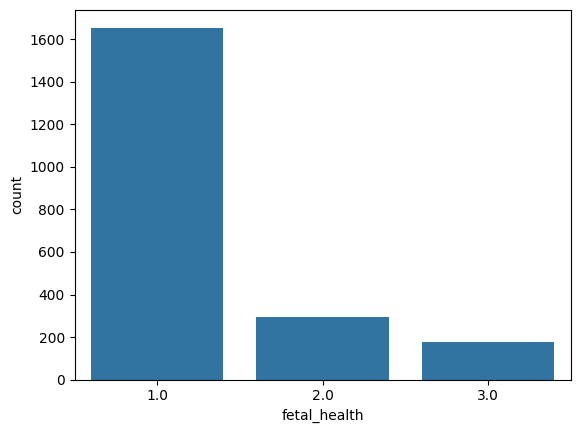

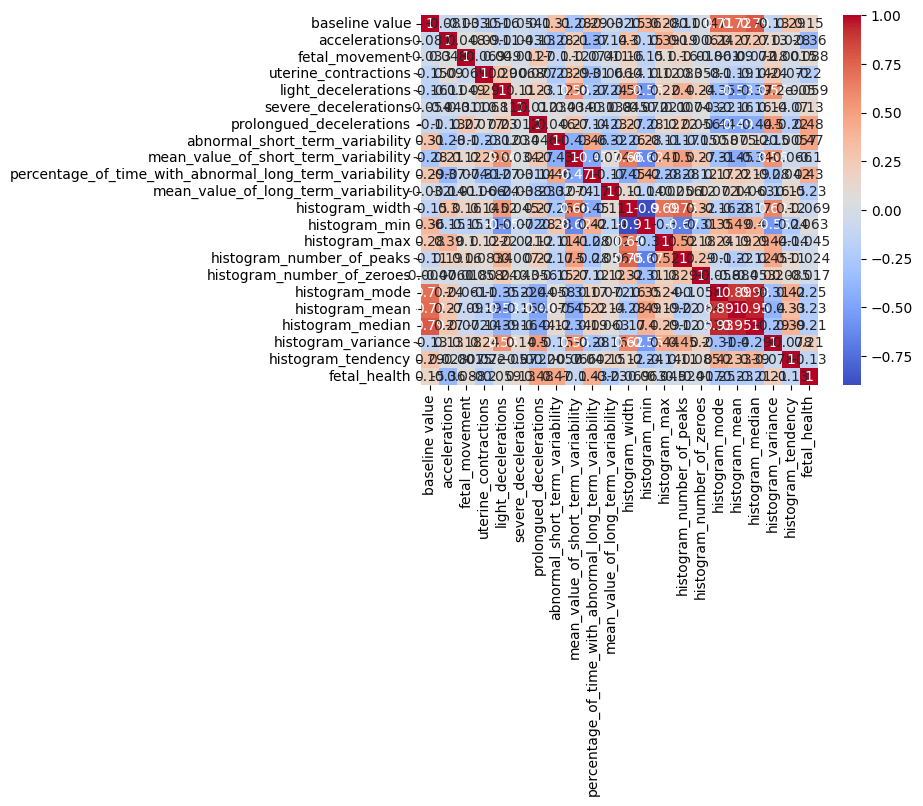

Confusion Matrix:
[[326   6   1]
 [ 13  50   1]
 [  1   1  27]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.88      0.78      0.83        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.94      0.95      0.94       426


Accuracy Score:
0.9460093896713615
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the data Frame :
df = pd.read_csv("C:\\Users\\DEEPAK\\Desktop\\w2c\\projects\\fetal_health.csv")

# Printing the first five lines to check the data has read successfully
print(df.head())

# Data preprocessing

# Check for null values
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)

sns.countplot(x='fetal_health', data=df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature scaling

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the Dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training 

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Hyperpameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


In [2]:
# Hyperpameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
